In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os, shutil
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import pandas as pd
import mdtraj as md
import pytraj as pt
import MDAnalysis as mda
import MDAnalysis.analysis.rms as rms
from MDAnalysis.analysis import align
from MDAnalysis.analysis import hbonds
import nglview as nv
import seaborn as sns

/home/angel/miniconda3/envs/Cheminformatics/lib/python3.6/site-packages/MDAnalysis/due.py:88: UserWarning: No module named 'mock'
  warnings.warn(str(err))


In [3]:
# Matplotlib options
%matplotlib inline
matplotlib.style.use('ggplot')
pylab.rcParams['figure.figsize'] = 12, 8

## Pictilisib-CD44 no WAT molecules

In [4]:
#top='../centered_traj/CD44_PIC.pdb'
#trajectory='../centered_traj/CD44_PIC_no_WAT.xtc'

## Pictilisib-CD44 including WAT

In [5]:
top='../../system_preparation/solv_ions.gro'
trajectory='../centered_traj/traj_full_centered_fitted.xtc'

### Creating Universe for MD analysis

In [6]:
u=mda.Universe (top,trajectory)
u

<Universe with 22146 atoms>

### Selection of ligand-receptor and protein systems to facilitate analysis

In [7]:
CD44_PIC=u.select_atoms('resid 0-151')
print (CD44_PIC)

<AtomGroup [<Atom 1: N of type N of resname ALA, resid 1 and segid SYSTEM>, <Atom 2: H1 of type H of resname ALA, resid 1 and segid SYSTEM>, <Atom 3: H2 of type H of resname ALA, resid 1 and segid SYSTEM>, ..., <Atom 1536: H15 of type H of resname PIC, resid 151 and segid SYSTEM>, <Atom 1537: C14 of type C of resname PIC, resid 151 and segid SYSTEM>, <Atom 1538: H14 of type H of resname PIC, resid 151 and segid SYSTEM>]>


In [8]:
CD44=u.select_atoms('protein')
print (CD44)

<AtomGroup [<Atom 1: N of type N of resname ALA, resid 1 and segid SYSTEM>, <Atom 2: H1 of type H of resname ALA, resid 1 and segid SYSTEM>, <Atom 3: H2 of type H of resname ALA, resid 1 and segid SYSTEM>, ..., <Atom 1494: C of type C of resname TYR, resid 150 and segid SYSTEM>, <Atom 1495: O1 of type O of resname TYR, resid 150 and segid SYSTEM>, <Atom 1496: O2 of type O of resname TYR, resid 150 and segid SYSTEM>]>


In [9]:
PIC=u.select_atoms('resname PIC')
print (PIC)

<AtomGroup [<Atom 1497: C20 of type C of resname PIC, resid 151 and segid SYSTEM>, <Atom 1498: C21 of type C of resname PIC, resid 151 and segid SYSTEM>, <Atom 1499: O3 of type O of resname PIC, resid 151 and segid SYSTEM>, ..., <Atom 1536: H15 of type H of resname PIC, resid 151 and segid SYSTEM>, <Atom 1537: C14 of type C of resname PIC, resid 151 and segid SYSTEM>, <Atom 1538: H14 of type H of resname PIC, resid 151 and segid SYSTEM>]>


### Save snapshots as models 

In [51]:
with mda.Writer ('../analysis/models/CD44_PIC.pdb', n_atoms=System) as W:
    for i in u.trajectory[0]:
        W.write (System)

/home/angel/miniconda3/envs/Cheminformatics/lib/python3.6/site-packages/MDAnalysis/coordinates/PDB.py:892: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  "".format(attrname, default))
/home/angel/miniconda3/envs/Cheminformatics/lib/python3.6/site-packages/MDAnalysis/coordinates/PDB.py:892: UserWarning: Found no information for attr: 'icodes' Using default value of ' '
  "".format(attrname, default))
/home/angel/miniconda3/envs/Cheminformatics/lib/python3.6/site-packages/MDAnalysis/coordinates/PDB.py:892: UserWarning: Found no information for attr: 'occupancies' Using default value of '1.0'
  "".format(attrname, default))
/home/angel/miniconda3/envs/Cheminformatics/lib/python3.6/site-packages/MDAnalysis/coordinates/PDB.py:892: UserWarning: Found no information for attr: 'tempfactors' Using default value of '0.0'
  "".format(attrname, default))


KeyboardInterrupt: 

### Visualizating Pic-CD44 system (no wat molecucules)

In [10]:
view= nv.show_mdanalysis (CD44_PIC)
view.clear_representations ()
view.add_ball_and_stick (selection='protein', aspectRatio=10, color='blue')
view.add_ball_and_stick(selection='PIC', aspectRatio=10)
view

/home/angel/miniconda3/envs/Cheminformatics/lib/python3.6/site-packages/MDAnalysis/coordinates/PDB.py:892: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  "".format(attrname, default))
/home/angel/miniconda3/envs/Cheminformatics/lib/python3.6/site-packages/MDAnalysis/coordinates/PDB.py:892: UserWarning: Found no information for attr: 'icodes' Using default value of ' '
  "".format(attrname, default))
/home/angel/miniconda3/envs/Cheminformatics/lib/python3.6/site-packages/MDAnalysis/coordinates/PDB.py:892: UserWarning: Found no information for attr: 'occupancies' Using default value of '1.0'
  "".format(attrname, default))
/home/angel/miniconda3/envs/Cheminformatics/lib/python3.6/site-packages/MDAnalysis/coordinates/PDB.py:892: UserWarning: Found no information for attr: 'tempfactors' Using default value of '0.0'
  "".format(attrname, default))


NGLWidget(count=218438)

## RMSD of CD44 alone (WAT and PIC no needed for this analysis)

In [11]:
R=rms.RMSD (u,reference=u,ref_frame=0, select='resid 1-150')
R.run()

Text(0,0.5,'RMSD (Angstrom)')

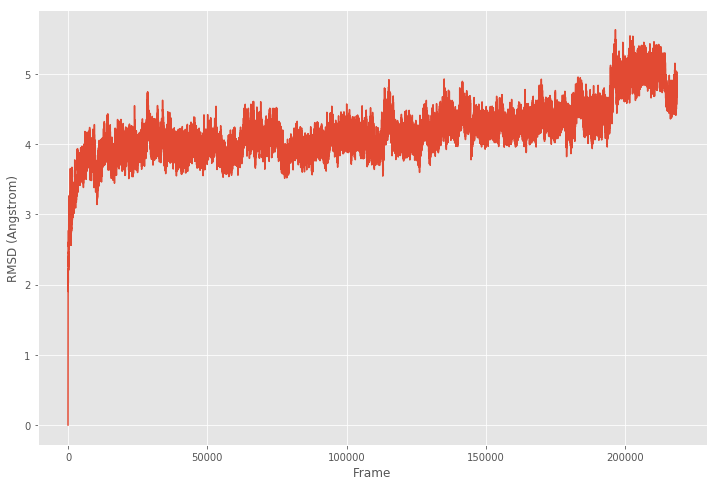

In [12]:
rmsd=R.rmsd.T
time = rmsd[1]
plt.plot (time,rmsd[2])
plt.xlabel ('Frame')
plt.ylabel ('RMSD (Angstrom)')

In [13]:
save=pd.DataFrame(time,rmsd[2])
save.to_csv("/home/angel/Documents/angel/experiments/CD44_Pictilisib_gromacs/results/analysis/protein_rmsd.csv")

## RMSF of alphacarbons of CD44

In [14]:
calphas = CD44.select_atoms("name CA")
rmsfer = rms.RMSF(calphas, verbose=True).run()

Step 218438/218438 [100.0%]


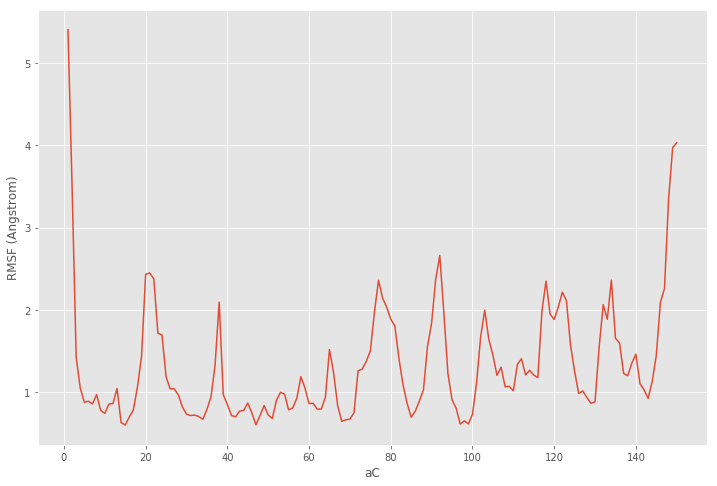

In [16]:
plt.plot(calphas.resnums, rmsfer.rmsf)
plt.xlabel ('aC')
plt.ylabel ('RMSF (Angstrom)')
plt.show ()

In [17]:
save=pd.DataFrame(rmsfer.rmsf)
save.to_csv('../analysis/protein_rmsf.csv')

## RMSD of Pictilisib (no wat and no CD44)

In [10]:
R=rms.RMSD (u,reference=u,ref_frame=0, select='resname PIC')
R.run()

Text(0,0.5,'RMSD (Angstrom)')

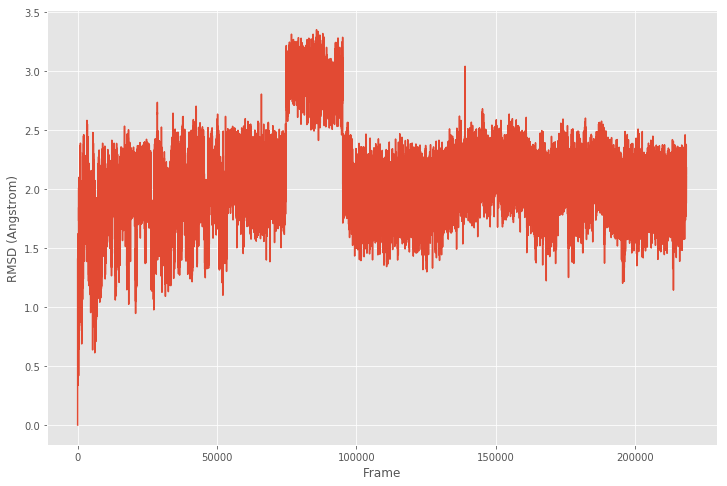

In [11]:
rmsd=R.rmsd.T
time = rmsd[1]
plt.plot (time,rmsd[2])
plt.xlabel ('Frame')
plt.ylabel ('RMSD (Angstrom)')

In [20]:
save=pd.DataFrame(time,rmsd[2])
save.to_csv("../analysis/PIC_rmsd.csv")

## RMSF of Pictilisib (Carbons and hetatoms)

In [21]:
PIC_heavy=PIC.select_atoms ('not name H*')
rmsfer = rms.RMSF(PIC_heavy, verbose=True).run()

Step 218438/218438 [100.0%]


Text(0,0.5,'RMSF (Angstrom)')

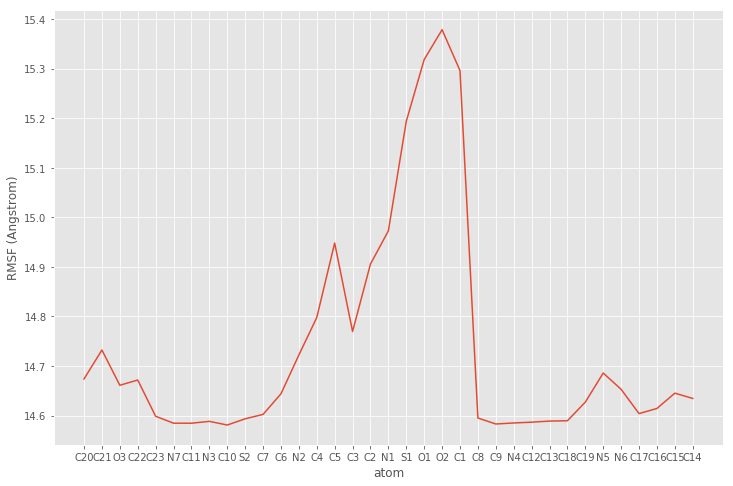

In [22]:
plt.plot(PIC_heavy.atoms.names, rmsfer.rmsf)
plt.xlabel ('atom')
plt.ylabel ('RMSF (Angstrom)')

In [36]:
save=pd.DataFrame(rmsfer.rmsf)
save.to_csv("../analysis/PIC_rmsf.csv")

## Hbonds analysis

In [25]:
System=u.select_atoms ('all')
print (System)

<AtomGroup [<Atom 1: N of type N of resname ALA, resid 1 and segid SYSTEM>, <Atom 2: H1 of type H of resname ALA, resid 1 and segid SYSTEM>, <Atom 3: H2 of type H of resname ALA, resid 1 and segid SYSTEM>, ..., <Atom 22144: NA of type NA of resname NA, resid 7021 and segid SYSTEM>, <Atom 22145: NA of type NA of resname NA, resid 7022 and segid SYSTEM>, <Atom 22146: NA of type NA of resname NA, resid 7023 and segid SYSTEM>]>


In [25]:
view= nv.show_mdanalysis (System)
view.clear_representations ()
view.add_ribbon (selection='protein')
view.add_ball_and_stick(selection='PIC', aspectRatio=10)
view.add_line (selection='water')
view

/home/angel/miniconda3/envs/Cheminformatics/lib/python3.6/site-packages/MDAnalysis/coordinates/PDB.py:892: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  "".format(attrname, default))
/home/angel/miniconda3/envs/Cheminformatics/lib/python3.6/site-packages/MDAnalysis/coordinates/PDB.py:892: UserWarning: Found no information for attr: 'icodes' Using default value of ' '
  "".format(attrname, default))
/home/angel/miniconda3/envs/Cheminformatics/lib/python3.6/site-packages/MDAnalysis/coordinates/PDB.py:892: UserWarning: Found no information for attr: 'occupancies' Using default value of '1.0'
  "".format(attrname, default))
/home/angel/miniconda3/envs/Cheminformatics/lib/python3.6/site-packages/MDAnalysis/coordinates/PDB.py:892: UserWarning: Found no information for attr: 'tempfactors' Using default value of '0.0'
  "".format(attrname, default))


NGLWidget(count=218438)

In [26]:
PIC=u.select_atoms('resname PIC')
print (PIC)

<AtomGroup [<Atom 1497: C20 of type C of resname PIC, resid 151 and segid SYSTEM>, <Atom 1498: C21 of type C of resname PIC, resid 151 and segid SYSTEM>, <Atom 1499: O3 of type O of resname PIC, resid 151 and segid SYSTEM>, ..., <Atom 1536: H15 of type H of resname PIC, resid 151 and segid SYSTEM>, <Atom 1537: C14 of type C of resname PIC, resid 151 and segid SYSTEM>, <Atom 1538: H14 of type H of resname PIC, resid 151 and segid SYSTEM>]>


In [27]:
for atom in PIC:        #Changing the names for PIC N,O and S atoms for Hbond analysis.
    if atom.type is 'N':
        atom.name='N'
    if atom.type is 'O':
        atom.name='O'
    if atom.type is 'S':
        atom.name='S'
    print (atom)

<Atom 1497: C20 of type C of resname PIC, resid 151 and segid SYSTEM>
<Atom 1498: C21 of type C of resname PIC, resid 151 and segid SYSTEM>
<Atom 1499: O of type O of resname PIC, resid 151 and segid SYSTEM>
<Atom 1500: C22 of type C of resname PIC, resid 151 and segid SYSTEM>
<Atom 1501: C23 of type C of resname PIC, resid 151 and segid SYSTEM>
<Atom 1502: N of type N of resname PIC, resid 151 and segid SYSTEM>
<Atom 1503: C11 of type C of resname PIC, resid 151 and segid SYSTEM>
<Atom 1504: N of type N of resname PIC, resid 151 and segid SYSTEM>
<Atom 1505: C10 of type C of resname PIC, resid 151 and segid SYSTEM>
<Atom 1506: S of type S of resname PIC, resid 151 and segid SYSTEM>
<Atom 1507: C7 of type C of resname PIC, resid 151 and segid SYSTEM>
<Atom 1508: C6 of type C of resname PIC, resid 151 and segid SYSTEM>
<Atom 1509: N of type N of resname PIC, resid 151 and segid SYSTEM>
<Atom 1510: H24 of type H of resname PIC, resid 151 and segid SYSTEM>
<Atom 1511: C4 of type C of resn

In [28]:
h_bonds=hbonds.HydrogenBondAnalysis (u,'resid 151', 'resid 1-150',forcefield='GLYCAM06',distance_type='hydrogen',distance=3.0,start=100001,pbc=True,filter_first=True)

In [29]:
h_bonds.run ()

HBonds frame 218437: 118437/118437 [100.0%]


In [30]:
h_bonds.generate_table()
hbonds_table=h_bonds.table
hbonds_timeseries=h_bonds.timeseries
num_hbonds_per_frame=[len(ii) for ii in hbonds_timeseries]

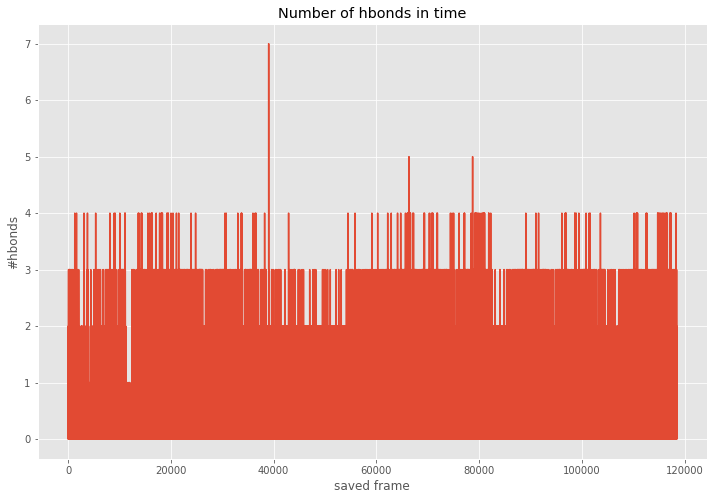

In [31]:
plt.plot(num_hbonds_per_frame)
plt.xlabel("saved frame")
plt.ylabel("#hbonds")
plt.title("Number of hbonds in time")
plt.show()

In [32]:
save=pd.DataFrame(num_hbonds_per_frame)
save.to_csv ('../analysis/hbonds_PIC_protein.csv')

In [33]:
df = pd.DataFrame.from_records(h_bonds.table)
df

,time,donor_index,acceptor_index,donor_resnm,donor_resid,donor_atom,acceptor_resnm,acceptor_resid,acceptor_atom,distance,angle
0,100001.0,548,1522,GLU,56,H,PIC,151,N,2.430496,152.455264
1,100002.0,548,1522,GLU,56,H,PIC,151,N,2.348061,165.110111
2,100003.0,548,1522,GLU,56,H,PIC,151,N,2.931657,136.353446
3,100004.0,548,1522,GLU,56,H,PIC,151,N,2.766770,163.880662
4,100005.0,548,1522,GLU,56,H,PIC,151,N,2.780453,159.426142
5,100006.0,548,1522,GLU,56,H,PIC,151,N,2.809273,132.464225
6,100007.0,548,1522,GLU,56,H,PIC,151,N,2.339527,144.392624
7,100008.0,548,1522,GLU,56,H,PIC,151,N,2.699278,163.545511
8,100010.0,548,1522,GLU,56,H,PIC,151,N,2.481610,149.728585
9,100011.0,548,1522,GLU,56,H,PIC,151,N,2.564315,143.974821


In [34]:
df.to_csv ('../analysis/hbond_table_PIC_protein.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9427c8a9e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f9427c2fe48>]], dtype=object)

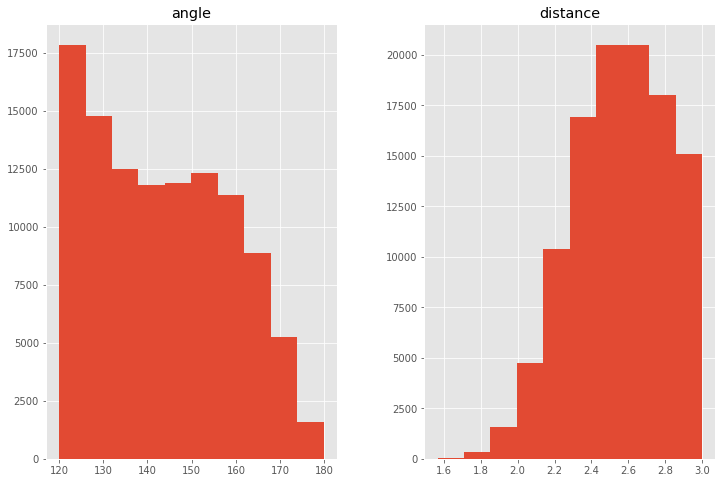

In [35]:
df.hist(column=['distance','angle'])